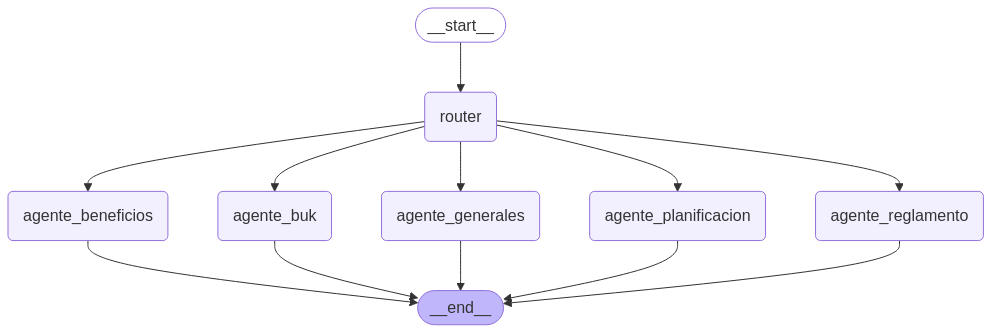

TypeError: Can't instantiate abstract class State with abstract methods clear, load_memory_variables, memory_variables, save_context

In [3]:
from langgraph.graph import StateGraph, START, END
from langchain.schema import BaseMemory
from typing import Dict
from IPython.display import display, Image

# Definir Estado con estructura clara
class State(BaseMemory):
    pregunta: str
    respuesta: str = ""

# Agente 1: Beneficios (Consulta en internet)
def agente_beneficios(state: State) -> Dict:
    pregunta = state.pregunta.lower()
    return {"respuesta": f"Buscando en internet información sobre: {pregunta}", "origen": "agente_beneficios"}

# Agente 2: BUK (Consulta de documentos y permisos)
def agente_buk(state: State) -> Dict:
    pregunta = state.pregunta.lower()
    return {"respuesta": f"Consultando en BUK sobre: {pregunta}", "origen": "agente_buk"}

# Agente 3: Reglamento Interno
def agente_reglamento(state: State) -> Dict:
    pregunta = state.pregunta.lower()
    return {"respuesta": f"Buscando en el reglamento interno sobre: {pregunta}", "origen": "agente_reglamento"}

# Agente 4: Preguntas Generales
def agente_generales(state: State) -> Dict:
    pregunta = state.pregunta.lower()
    if "fecha de pago" in pregunta:
        return {"respuesta": "Las fechas de pago de sueldos son el 30 de cada mes", "origen": "agente_generales"}
    return {"respuesta": "No tengo información sobre esa consulta.", "origen": "agente_generales"}

# Agente 5: Planificación
def agente_planificacion(state: State) -> Dict:
    pregunta = state.pregunta.lower()
    if "tareas pendientes" in pregunta:
        return {"respuesta": "Sus tareas pendientes!", "origen": "agente_planificacion"}
    return {"respuesta": "No tengo información sobre esa consulta.", "origen": "agente_planificacion"}

# Router para decidir qué agente manejará la consulta
def router(state: State) -> str:
    pregunta = state.pregunta.lower()
    if "beneficio" in pregunta or "ayuda" in pregunta:
        return "agente_beneficios"
    elif "documento" in pregunta or "permiso" in pregunta:
        return "agente_buk"
    elif "reglamento" in pregunta or "seguridad" in pregunta:
        return "agente_reglamento"
    elif "tarea" in pregunta or "planificación" in pregunta:
        return "agente_planificacion"
    return "agente_generales"

# Crear el flujo del grafo multiagente
workflow = StateGraph(State)

# Agregar nodos al grafo
workflow.add_node("agente_beneficios", agente_beneficios)
workflow.add_node("agente_buk", agente_buk)
workflow.add_node("agente_reglamento", agente_reglamento)
workflow.add_node("agente_generales", agente_generales)
workflow.add_node("agente_planificacion", agente_planificacion)

# Agregar nodo Router
workflow.add_node("router", router)

# Definir flujo de nodos
workflow.add_edge(START, "router")  # Punto de entrada: Router decide el flujo
workflow.add_edge("router", "agente_beneficios")
workflow.add_edge("router", "agente_buk")
workflow.add_edge("router", "agente_reglamento")
workflow.add_edge("router", "agente_generales")
workflow.add_edge("router", "agente_planificacion")

# Todos los agentes llevan al final
workflow.add_edge("agente_beneficios", END)
workflow.add_edge("agente_buk", END)
workflow.add_edge("agente_reglamento", END)
workflow.add_edge("agente_generales", END)
workflow.add_edge("agente_planificacion", END)

# Compilar el grafo
graph = workflow.compile()
# Mostrar el grafo en una imagen
display(Image(graph.get_graph().draw_mermaid_png()))
# Prueba inicial
if __name__ == "__main__":
    estado_inicial = State(pregunta="¿Cuál es la fecha de pago del sueldo?")
    response = graph.invoke(estado_inicial)
    print(f"Respuesta ({response['origen']}): {response['respuesta']}")
